In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve


# Data display coustomization
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")

In [3]:
tc_df = pd.read_csv('telecom_churn_data.csv')
tc_df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
tc_df.shape

(99999, 226)

In [4]:
tc_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [90]:
# keep mobile no and circle it data set aside for later use
tc_df_customer_id=tc_df[['mobile_number','circle_id']]
tc_df_customer_id.shape

(96720, 2)

In [6]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


There are 12 columns of categorical or non-numeric type. These are date specific columns. The last recharge date and last day of month may not add significant insights in the predict churn rate. I think we can drop these columns 

In [7]:
tc_df.select_dtypes(include=['object']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [7]:
tc_df.select_dtypes(include=['object']).head(5)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [8]:
for col in tc_df.select_dtypes(include=['object']).columns:        
    tc_df.drop(columns=[col],axis=1, inplace=True)
    
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 214 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35)
memory usage: 163.3 MB


Lets see how many attributes has NA/null records 

In [9]:
tc_df.isnull().sum()

mobile_number             0
circle_id                 0
loc_og_t2o_mou         1018
std_og_t2o_mou         1018
loc_ic_t2o_mou         1018
arpu_6                    0
arpu_7                    0
arpu_8                    0
arpu_9                    0
onnet_mou_6            3937
onnet_mou_7            3859
onnet_mou_8            5378
onnet_mou_9            7745
offnet_mou_6           3937
offnet_mou_7           3859
offnet_mou_8           5378
offnet_mou_9           7745
roam_ic_mou_6          3937
roam_ic_mou_7          3859
roam_ic_mou_8          5378
roam_ic_mou_9          7745
roam_og_mou_6          3937
roam_og_mou_7          3859
roam_og_mou_8          5378
roam_og_mou_9          7745
loc_og_t2t_mou_6       3937
loc_og_t2t_mou_7       3859
loc_og_t2t_mou_8       5378
loc_og_t2t_mou_9       7745
loc_og_t2m_mou_6       3937
loc_og_t2m_mou_7       3859
loc_og_t2m_mou_8       5378
loc_og_t2m_mou_9       7745
loc_og_t2f_mou_6       3937
loc_og_t2f_mou_7       3859
loc_og_t2f_mou_8    

Looking at the percentage of null records in each of these attributes.

In [9]:
def missing_value_percentage():
    nullcols=(100*(tc_df.isnull().sum()/len(tc_df.index)).round(2)).sort_values(ascending=False)
    return nullcols

nullcols=missing_value_percentage()
nullcols[nullcols>0]

av_rech_amt_data_6    75.0
count_rech_2g_6       75.0
night_pck_user_6      75.0
count_rech_3g_6       75.0
fb_user_6             75.0
arpu_3g_6             75.0
max_rech_data_6       75.0
arpu_2g_6             75.0
total_rech_data_6     75.0
max_rech_data_9       74.0
arpu_2g_7             74.0
night_pck_user_8      74.0
night_pck_user_7      74.0
arpu_2g_9             74.0
arpu_2g_8             74.0
arpu_3g_9             74.0
count_rech_2g_9       74.0
arpu_3g_8             74.0
arpu_3g_7             74.0
count_rech_3g_7       74.0
count_rech_3g_8       74.0
count_rech_3g_9       74.0
av_rech_amt_data_7    74.0
night_pck_user_9      74.0
count_rech_2g_7       74.0
count_rech_2g_8       74.0
total_rech_data_7     74.0
fb_user_9             74.0
fb_user_8             74.0
fb_user_7             74.0
av_rech_amt_data_9    74.0
av_rech_amt_data_8    74.0
total_rech_data_8     74.0
total_rech_data_9     74.0
max_rech_data_7       74.0
max_rech_data_8       74.0
loc_og_t2t_mou_9       8.0
s

Lets see the missing value percentage for the arpu_* attributes which reflects the average revenue generation per user. 

In [10]:
def filter_df_and_research(search_str):
    col_list=[]
    for col in tc_df.columns:
        if str(col).find(str(search_str)) > -1:
            col_list.append(col)

    filter_df=pd.DataFrame()
    for col in col_list:
        filter_df[col]=tc_df[col]
    return filter_df

In [11]:
filter_df=filter_df_and_research('arpu')
filter_df.isnull().sum()

arpu_6           0
arpu_7           0
arpu_8           0
arpu_9           0
arpu_3g_6    74846
arpu_3g_7    74428
arpu_3g_8    73660
arpu_3g_9    74077
arpu_2g_6    74846
arpu_2g_7    74428
arpu_2g_8    73660
arpu_2g_9    74077
dtype: int64

The average revenue for 2g/3g data usage has > 73% records as Nan or null. We can get rid-off these columns as imputing 73% data with 0 may not add much value where we have monthly average revenue for using the service as arpu_ attributes. 

In [12]:
tc_df.drop(columns=['arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_2g_9','arpu_3g_9'], inplace=True)


lets examine the attributes having "rech" in their atibute name to see if we derive any additional insights which might be helpful in our model later

In [13]:
filter_df=filter_df_and_research('rech')
filter_df.isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64

How many times user recharges during these four months for 2g/3g data has more than 73%missing values. Also most of the values for these attributes are eiher 0. or 1. Dropping these columns.


In [39]:
filter_df.describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [14]:
for count_reach_col in tc_df.columns:
    if str(count_reach_col).startswith('count'):
        print("Dropping col: "+ str(count_reach_col))
        tc_df.drop(columns=[count_reach_col], inplace=True)

Dropping col: count_rech_2g_6
Dropping col: count_rech_2g_7
Dropping col: count_rech_2g_8
Dropping col: count_rech_2g_9
Dropping col: count_rech_3g_6
Dropping col: count_rech_3g_7
Dropping col: count_rech_3g_8
Dropping col: count_rech_3g_9


Many columns are having very high missing value percentage. These columns are very important for the data analysis for example, arpu_ attributes which are average revenue per user for particular services. We cannot drop off these columns instead we can impute the missing records with 0. Which suggests no revenue or 0 amount revenue for some reason.

In [15]:
# impute the null/missing values with integer 0 for cols > 70% missing value
nullcols=missing_value_percentage()
nullcols_70=nullcols[nullcols>70]
for col in nullcols_70.index:
    tc_df[col].fillna("0",inplace=True)
nullcols=missing_value_percentage()
nullcols[nullcols>0]

isd_og_mou_9        8.0
loc_og_t2t_mou_9    8.0
std_og_t2c_mou_9    8.0
std_ic_t2t_mou_9    8.0
std_ic_t2f_mou_9    8.0
roam_og_mou_9       8.0
std_og_t2f_mou_9    8.0
loc_ic_t2f_mou_9    8.0
std_og_t2m_mou_9    8.0
offnet_mou_9        8.0
std_ic_t2m_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_ic_mou_9        8.0
std_og_t2t_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_mou_9        8.0
loc_ic_t2m_mou_9    8.0
roam_ic_mou_9       8.0
spl_ic_mou_9        8.0
loc_ic_t2t_mou_9    8.0
std_og_mou_9        8.0
og_others_9         8.0
spl_og_mou_9        8.0
std_ic_mou_9        8.0
ic_others_9         8.0
isd_ic_mou_9        8.0
loc_og_t2c_mou_9    8.0
std_ic_t2o_mou_9    8.0
onnet_mou_9         8.0
std_og_t2f_mou_8    5.0
isd_ic_mou_8        5.0
std_ic_t2f_mou_8    5.0
std_og_t2m_mou_8    5.0
spl_ic_mou_8        5.0
std_ic_mou_8        5.0
std_ic_t2m_mou_8    5.0
std_og_t2c_mou_8    5.0
std_ic_t2o_mou_8    5.0
std_og_t2t_mou_8    5.0
ic_others_8         5.0
loc_og_mou_8        5.0
std_og_mou_8    

For all the other attibutes which has < 10% missing value, we are imputing these with the median value with corresponding attribute

In [16]:
tc_df['total_rech_amt_8'].median()
#tc_df['total_rech_amt_8'].mean()


225.0

In [17]:
for col in nullcols.index:  
    median=tc_df[col].median().round(2)
    #print("imputing {} with {}".format(col,median))
    tc_df[col].fillna(median,inplace=True)


In [18]:
nullcols=missing_value_percentage()
nullcols[nullcols>0]

Series([], dtype: float64)

In [19]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 198 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(20)
memory usage: 151.1+ MB


In [20]:
# converting the columns type as int 
for col in tc_df.columns:
    tc_df[col]=tc_df[col].astype(int)
    #tc_df[col]=tc_df[col].apply(pd.to_numeric)  


In [21]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 198 entries, mobile_number to sep_vbc_3g
dtypes: int64(198)
memory usage: 151.1 MB


In [22]:
tc_df.shape

(99999, 198)

#### Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In [23]:
total_rech_df=filter_df_and_research('rech')
total_rech_df.head(3)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,252,0,1,1,1,0,252,252,252,0,252,252,252,0
1,4,9,11,5,74,384,283,121,44,154,65,50,0,1,2,0,0,154,25,0,0,154,50,0
2,5,4,2,7,168,315,116,358,86,200,86,100,0,0,0,1,0,0,0,46,0,0,0,46


Deriving average recharge amount for months June and July for mobile service and data usages corrspnding to Good phase. 

1. calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
2. calculate total recharge amount for June and July --> call recharge amount (total_rech_amt) + data recharge amount
3. calculate average recharge done by customer in June and July

In [24]:
def total_data_rech(total_rech_num_item,av_rech_amt_data_item):
    total_data_rech_amt=int(total_rech_num_item)*int(av_rech_amt_data_item)
    return int(total_data_rech_amt)

def total_rech_amt(total_rech_num_item,total_rech_amt_item,av_rech_amt_data_item):
    total_data_rech_amt=total_data_rech(total_rech_num_item,av_rech_amt_data_item)
    return np.sum(int(total_rech_amt_item)+int(total_data_rech_amt))

In [25]:
tc_df['total_rech_amt_6']=tc_df.apply(lambda row: total_rech_amt(row['total_rech_num_6'],row['total_rech_amt_6'],row['av_rech_amt_data_6']), axis=1)
tc_df['total_rech_amt_7']=tc_df.apply(lambda row: total_rech_amt(row['total_rech_num_7'],row['total_rech_amt_7'],row['av_rech_amt_data_7']), axis=1)

In [26]:
tc_df['total_rech_amt_6'].describe()

count     99999.000000
mean        791.471285
std        2005.463852
min           0.000000
25%         110.000000
50%         282.000000
75%         746.000000
max      271924.000000
Name: total_rech_amt_6, dtype: float64

In [28]:
tc_df['avg_rech_amt_6_7']=tc_df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
tc_df['avg_rech_amt_6_7'].astype(int)
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 199 entries, mobile_number to avg_rech_amt_6_7
dtypes: float64(1), int64(198)
memory usage: 151.8 MB


In [29]:
tc_df['avg_rech_amt_6_7'].describe()

count     99999.000000
mean        809.875874
std        1773.133278
min           0.000000
25%         132.500000
50%         310.000000
75%         803.000000
max      155099.000000
Name: avg_rech_amt_6_7, dtype: float64

There are outliers in the avg_rech_amt_6_7 attribute as the standard deviation is way too high compared to other statistical attributes. Which we can treat after PCA feature component analysis.

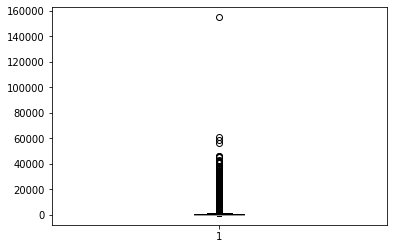

In [30]:
plt.boxplot(tc_df['avg_rech_amt_6_7'])
plt.show()

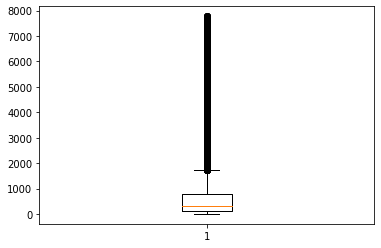

In [31]:
# removing (statistical) outliers for avg_rech_amt_6_7 column
Q1 = tc_df['avg_rech_amt_6_7'].quantile(0.05)
Q3 = tc_df['avg_rech_amt_6_7'].quantile(0.95)
IQR = Q3-Q1
tc_df = tc_df.loc[(tc_df['avg_rech_amt_6_7'] >= Q1 - 1.5*IQR) & (tc_df['avg_rech_amt_6_7'] <= Q3 + 1.5*IQR)]
plt.boxplot(tc_df['avg_rech_amt_6_7'])
plt.show()

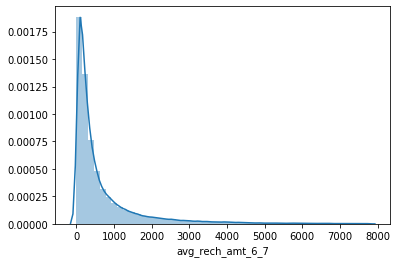

In [32]:
sns.distplot(tc_df['avg_rech_amt_6_7'])
plt.show()

In [247]:
tc_df['avg_rech_amt_6_7'].describe()

count    96676.000000
mean       580.533876
std        724.068826
min          0.000000
25%        128.000000
50%        295.000000
75%        715.000000
max       3977.500000
Name: avg_rech_amt_6_7, dtype: float64

Most of the data point for average recharge amount are lying less than 4000. Baed on the boxplot and the data point distribution we can see there are still outliers, so lets consider all the rows having data point < 4000.

In [33]:
tc_df=tc_df.loc[(tc_df['avg_rech_amt_6_7'] < 4000)]
tc_df['avg_rech_amt_6_7'].shape

(96720,)

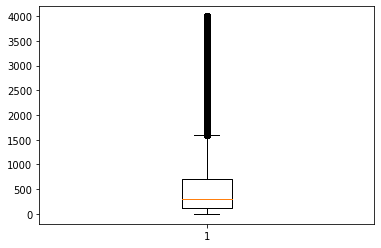

In [34]:
plt.boxplot(tc_df['avg_rech_amt_6_7'])
plt.show()

Since we have derived new feature in terms of averaging out mobile service and data recharge for Good phase, dropping the individual total_rech_data[6/7], total_rehc_amt_(6/7) columns

In [35]:
tc_df.drop(columns=['total_rech_data_6','total_rech_data_7','total_rech_amt_6','total_rech_amt_6','av_rech_amt_data_6'], inplace=True)
tc_df.shape

(96720, 195)

#### Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.

In [36]:
rech_amt_threshold=tc_df['avg_rech_amt_6_7'].quantile(0.70)
rech_amt_threshold.round(2)

579.0

Filtering out customers based on average recharge amount more than 368.5. Crating a new dataframe tc_high_valued_df which we will use to process further. Keeping the original data set tc_df as is for future refrences if needed. 

In [37]:
tc_high_valued_df=tc_df.loc[(tc_df['avg_rech_amt_6_7'] >= rech_amt_threshold)]
tc_high_valued_df.shape

(29037, 195)

In [87]:
#tc_df['total_ic_mou_9'].value_counts() 


#### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [173]:
df1=tc_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
print(df1.isnull().sum())
df1.head(5)

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64


,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0,0,0,0
1,188,72,0,0
2,517,124,0,8
3,305,362,0,0
4,205,104,0,0


In [38]:
def tag_churners(total_ic_mou_item, total_og_mou_item, vol_2g_mb_item, vol_3g_mb_item):
    if (int(total_ic_mou_item) > 0 or int(total_og_mou_item) > 0) and (int(vol_2g_mb_item) > 0 or int(vol_3g_mb_item) > 0):
        return 0
    else:
        return 1

#tc_high_valued_df['churn'] = [tag_churners(row['total_ic_mou_9'],row['total_og_mou_9'],row['vol_2g_mb_9'],row['vol_3g_mb_9']) for row in tc_high_valued_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].values]    
tc_high_valued_df['churn']=tc_high_valued_df.apply(lambda row: tag_churners(row['total_ic_mou_9'],row['total_og_mou_9'],row['vol_2g_mb_9'],row['vol_3g_mb_9']),axis=1)
tc_high_valued_df['churn'].value_counts()

1    15890
0    13147
Name: churn, dtype: int64

In [39]:
filter_chured_phase_df=filter_df_and_research('_9')
print(filter_chured_phase_df.shape)
for col in filter_chured_phase_df.columns:
    #print("Dropping... " + str(col))
    tc_high_valued_df.drop(columns=[col], inplace=True)
print(tc_high_valued_df.shape)

(96720, 47)
(29037, 149)


Since the rate of churn is typically low (about 5-10%), this is called class-imbalance. We need to handle class-imbalance in the data set 

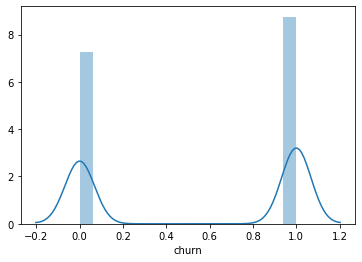

In [40]:
sns.distplot(tc_high_valued_df['churn'])
plt.show()

In [41]:
# churn rate
(len(tc_high_valued_df.loc[tc_high_valued_df['churn']==0]))/(len(tc_high_valued_df.loc[tc_high_valued_df['churn']==1]))*100

82.7375707992448

#### Model Building

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance

In my case, I got 82% churn rate which is quite high. There could be data imbalance as 80% and above customer didnt make any call and didnt use mobile internet for entire month of September may not possible. So, there could be **class imbalance** which we can addresse by class-weight parameter of any classifier model API

In [42]:
# split the data into train/test 
X = tc_high_valued_df.drop(['churn','mobile_number'],axis=1)
y = tc_high_valued_df['churn']

# Scale the features using StnadardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.        ,  0.        ,  0.        , ..., -0.07910476,
        -0.0741235 , -0.30033608],
       [ 0.        ,  0.        ,  0.        , ..., -0.40880531,
        -0.14078232, -0.6262539 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.35004679,
        -0.14078232, -0.30521875],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.40880531,
        -0.14078232, -0.05376156],
       [ 0.        ,  0.        ,  0.        , ...,  3.42029113,
        -0.14078232,  0.64079738],
       [ 0.        ,  0.        ,  0.        , ..., -0.40880531,
        -0.14078232, -0.84841511]])

In [43]:
# split into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=101)

##### Doing dimentionality reduction using PCA

In [44]:
X_train.shape

(20325, 147)

In [45]:
pca = PCA(random_state=45)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=45,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
# eigen vectors
pca.components_

array([[ 4.42042822e-19, -1.11022302e-16, -1.11022302e-16, ...,
        -4.16829036e-02, -1.03966694e-03, -4.13399687e-02],
       [ 2.89558986e-20, -2.46330734e-16, -3.46944695e-16, ...,
         4.83183480e-02,  2.49894493e-03,  4.95625024e-01],
       [ 4.78577122e-19, -3.88578059e-16,  2.49800181e-16, ...,
        -2.29216610e-03,  4.30303325e-04, -2.63820563e-02],
       ...,
       [ 0.00000000e+00,  1.51268259e-03,  1.76277653e-03, ...,
        -3.82181266e-18, -2.90532301e-17, -4.66206934e-18],
       [ 0.00000000e+00,  3.44827083e-04, -3.30931953e-05, ...,
         4.94667241e-18,  2.21202654e-17, -4.77048956e-18],
       [ 1.00000000e+00, -9.63093162e-27,  6.16884298e-27, ...,
         5.68102846e-19,  7.36706650e-18,  2.13469192e-19]])

Looking at the **explained variance (eigen values) ratio** for each component

In [47]:
var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3))
var

array([0.273, 0.445, 0.546, 0.61 , 0.667, 0.723, 0.769, 0.8  , 0.825,
       0.845, 0.862, 0.877, 0.889, 0.899, 0.909, 0.918, 0.926, 0.933,
       0.94 , 0.944, 0.948, 0.952, 0.956, 0.96 , 0.963, 0.966, 0.969,
       0.972, 0.974, 0.976, 0.978, 0.98 , 0.982, 0.983, 0.984, 0.985,
       0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
       0.995, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996,

In the above array we can see that first feature exaplined roughly arond 27% of the variance in our dataset while the first two explained 44%, first three explained 54%, then 61% and so on. If we consider 30 features we capture ~98% of the variance within data set. 

Making a scree plot for the explained variance

In [48]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

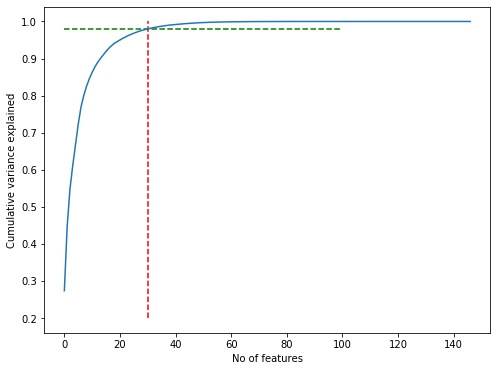

In [50]:
fig = plt.figure(figsize=[8,6])
plt.vlines(x=30, ymax=1, ymin=0.2, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("No of features")
plt.show()

From the above Scree plot we can decide to keep ~ 98% variance using 30-35 feature thus out of 149 features from training set X_train we able to dimentionality reduction and can use 30-35 features for our model building. 

In [73]:
# dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [74]:
df_train_pca = pca_final.fit_transform(X_train)

In [75]:
df_train_pca.shape

(20325, 30)

In [76]:
# transpose, so it does column-2-column comparation
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(30, 30)

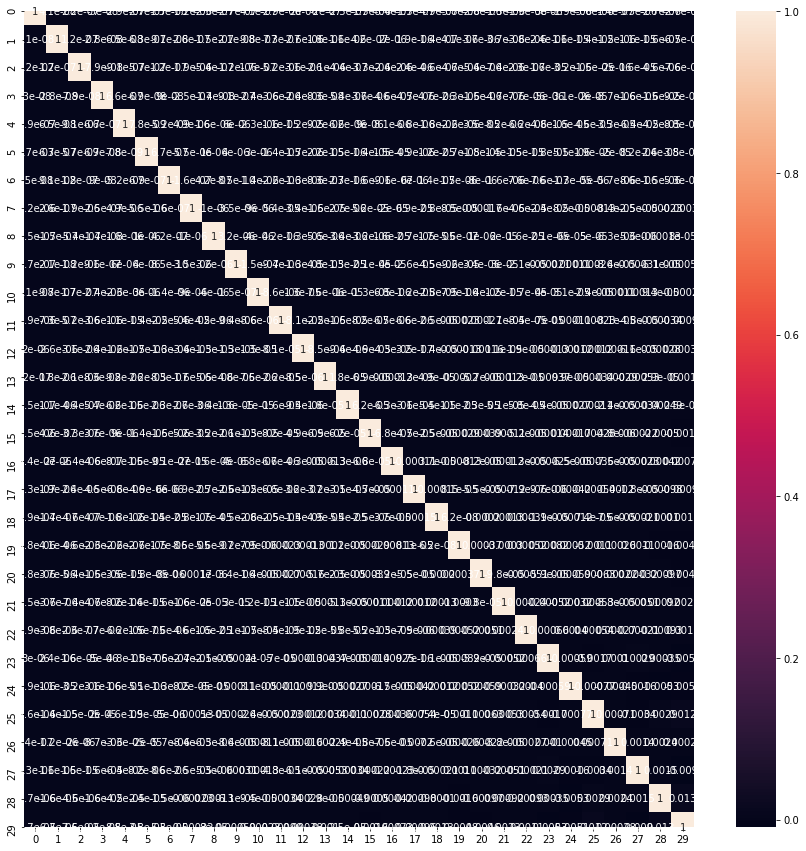

In [59]:
# Lets see the heatmap
plt.figure(figsize=[15,15])
sns.heatmap(corrmat,annot=True)
plt.show()

From the above heatmap we can observe that multi-collineary is gone because of PCA. 

In [77]:
# perform the same transformation on test data
df_test_pca = pca_final.fit_transform(X_test)
df_test_pca.shape

(8712, 30)

#### Model Building

Using class_weight='balanced' to handle any class imbalance in the training data set 

In [183]:
# The desision treee with default hyperparameter initially. The default treee depth is 5.
dt_default = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt_default.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [184]:
# Making predictions with test set
def y_pred_util(dt_model,df_test_pca):
    # probability prediction
    y_pred_proba = dt_model.predict_proba(df_test_pca)
    
    # boolean prediction
    y_pred=dt_model.predict(df_test_pca)
    
    y_pred_df = pd.DataFrame(y_pred_proba)
    y_pred_df['churn_proba']=y_pred_df[1]
    y_pred_df['predicted']=y_pred
    y_pred_df.drop(columns=[0,1],inplace=True, axis=1)
        
    # Let's see the head
    return y_pred_df


In [185]:
y_pred_df=y_pred_util(dt_default,df_test_pca)
y_pred_df.head()

,churn_proba,predicted
0,0.560300,1
1,0.468231,0
2,0.139608,0
3,0.261636,0
4,0.334466,0


In [186]:
y_pred_df.shape

(8712, 2)

In [187]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
8186,1
24310,0
80630,1
51404,0
55481,1


In [188]:
y_test_df['customer_id']=y_test_df.index

In [189]:
def y_pred_final_util(y_test_df,y_pred_df):
    
    # Removing index for both dataframes to append them side by side 
    y_pred_df.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)

    # Appending y_test_df and y_pred_df
    y_pred_final=pd.concat([y_test_df,y_pred_df],axis=1)
    return y_pred_final

In [190]:
y_pred_final=y_pred_final_util(y_test_df,y_pred_df)
y_pred_final.head()

,churn,customer_id,churn_proba,predicted
0,1,8186,0.560300,1
1,0,24310,0.468231,0
2,1,80630,0.139608,0
3,0,51404,0.261636,0
4,1,55481,0.334466,0


In [191]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_pred_final.churn,y_pred_final.predicted))
print(accuracy_score(y_pred_final.churn,y_pred_final.predicted))

[[3154  785]
 [1741 3032]]
0.7100550964187328


With default hyperparameter the accuracy of the model is merely 71%. As per the confusion matrix we can see the default model predicted `3032` as probable 'churn' customer out of `1741+3032=4773` actual to be churned cusotmers. Which is like about **66%**. So our default model predictions on the churned customer is about **66%** and the model accuracy is about **71%**. 

In [192]:
# lets see the roc score and the visual presenation of actual predicts v/s model prediction
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


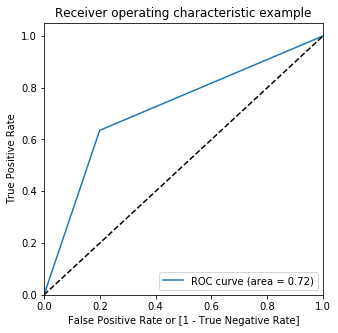

In [193]:
draw_roc(y_pred_final.churn,y_pred_final.predicted)

#### Tuning Hyperparameters

Lets use gridsearch cross validation API and try to fine tune some hypermeter such as **max-depth**, **min_sample_leaf**, **min_samples_split**

In [221]:
def dtc_tune_hyperparam_util(n_folds,parameters,df_train_pca,y_train,randomize):
    # specify number of folds for k-fold CV
    n_folds = 5
    
    # instantiate model
    dtc = DecisionTreeClassifier(criterion='gini', class_weight='balanced',
                                 random_state=randomize)
    
    #fit three on pca train data
    gscv_tree=GridSearchCV(estimator=dtc,                           
                          cv=n_folds,
                          param_grid=parameters,
                          scoring="accuracy",
                          return_train_score=True,
                          verbose=1)
    gscv_tree.fit(df_train_pca,y_train)
    return gscv_tree

In [217]:
def plot_mean_train_test_score_with_accuracy(scores,hyper_param):
    plt.figure(figsize=(8,6))
    plt.plot(scores["param_"+ str(hyper_param)], 
         scores["mean_train_score"], 
         label="training accuracy")
    plt.plot(scores["param_" + str(hyper_param)], 
         scores["mean_test_score"], 
         label="test accuracy")
    plt.xlabel(hyper_param)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [211]:
# tuning max_depth parameter
parameters = {'max_depth': range(1,40)}
randomize=101
gscv_tree=dtc_tune_hyperparam_util(n_folds,parameters,df_train_pca,y_train,randomize)

# scores of GridSearch CV
max_depth_scores = gscv_tree.cv_results_

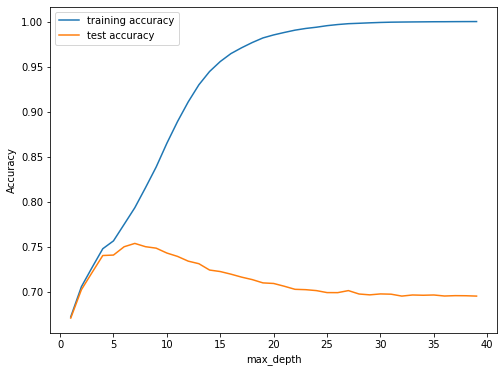

In [214]:
plot_mean_train_test_score_with_accuracy(max_depth_scores,"max_depth")

As we increase the value of max_depth, both training and test score increase till about **max-depth = 7**, after which the test score gradually reduces. The scores are average accuracies across the 5-folds.

Thus, it is clear that the model is `overfitting` the training data if the max_depth is higher than 7/8.

In [215]:
# tuning hyper parameter min_samples_split
parameters = {'min_samples_split': range(5, 200, 20)}
randomize=101
gscv_tree=dtc_tune_hyperparam_util(n_folds,parameters,df_train_pca,y_train,randomize)

# scores of GridSearch CV
min_samples_split_scores = gscv_tree.cv_results_

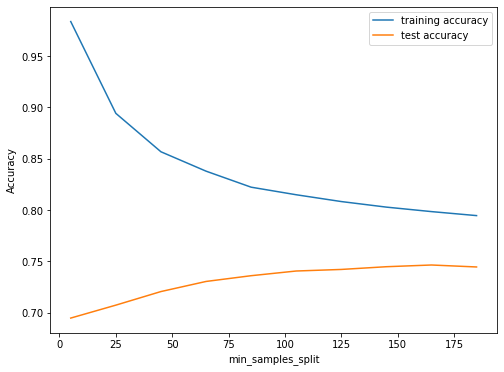

In [218]:
plot_mean_train_test_score_with_accuracy(min_samples_split_scores,"min_samples_split")

This shows that as you increase the **min_samples_split**, the tree overfits lesser since the model is less complex.

In [219]:
# tuning hyper parameter min_samples_leaf
parameters = {'min_samples_leaf': range(5, 200, 20)}
randomize=101
gscv_tree=dtc_tune_hyperparam_util(n_folds,parameters,df_train_pca,y_train,randomize)

# scores of GridSearch CV
min_samples_leaf_scores = gscv_tree.cv_results_

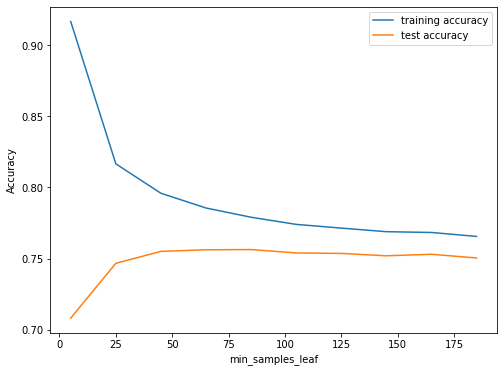

In [220]:
plot_mean_train_test_score_with_accuracy(min_samples_leaf_scores,"min_samples_leaf")

The **min_samples_leaf** indicates the minimum number of samples required to be in leaf to stop the tree to further split. Here from the above plot we can see that if the **min_samples_leaf** goes beyond **125-150** the training and test accuracy tries to converge. Hence the model becomes more robust and accurate.

##### Find the optimal hyperparameter using gridsearch 

In [223]:
parameters = {
    'max_depth': range(1,10),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)    
}
n_folds=5
randomize=101
gscv_tree=dtc_tune_hyperparam_util(n_folds,parameters,df_train_pca,y_train,randomize)

# best accuracy scores of GridSearch CV
print("best accuracy", gscv_tree.best_score_)
print(gscv_tree.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.1min finished


best accuracy 0.7556211562115621
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')


**Running the model with best parameters obtained from grid search.**

In [225]:
clf_gini=DecisionTreeClassifier(criterion = "gini", 
                                  class_weight="balanced",
                                  random_state = 101,
                                  max_depth=8, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

#### Model Evaluation

In [226]:
# accuracy score
clf_gini.score(df_test_pca,y_test)

0.6931818181818182

In [227]:
y_pred_df=y_pred_util(clf_gini,df_test_pca)
y_pred_df.head()

,churn_proba,predicted
0,0.560300,1
1,0.721858,1
2,0.102128,0
3,0.133450,0
4,0.334466,0


In [229]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
#y_test_df.head()
y_test_df['customer_id']=y_test_df.index

In [230]:
# create y_pred_final dataframe 
y_pred_final=y_pred_final_util(y_test_df,y_pred_df)
y_pred_final.head()

,churn,customer_id,churn_proba,predicted
0,1,8186,0.560300,1
1,0,24310,0.721858,1
2,1,80630,0.102128,0
3,0,51404,0.133450,0
4,1,55481,0.334466,0


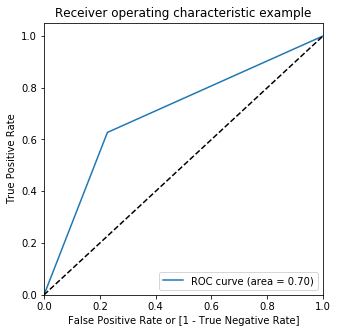

In [231]:
# draw ROC curve 
draw_roc(y_pred_final.churn,y_pred_final.predicted)

In [232]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_pred_final.churn,y_pred_final.predicted))
print(accuracy_score(y_pred_final.churn,y_pred_final.predicted))

[[3045  894]
 [1779 2994]]
0.6931818181818182


As per the confusion matrix out of total **1779+2994=4773** customers model predicts only **2994** customer would churn in month of September. Which is close to **63%** customers might churn. 
With initial default classifier the earlier the model was predicted that 71% customer would churn but after tuning the hyper parameter the final model predicts that 62%-63% customer would churn. Which is good improvement of the model. 

#### Find the list of customers who would probably churn 

In [233]:
y_pred_final.head()

,churn,customer_id,churn_proba,predicted
0,1,8186,0.560300,1
1,0,24310,0.721858,1
2,1,80630,0.102128,0
3,0,51404,0.133450,0
4,1,55481,0.334466,0


In [236]:
y_pred_final.shape

(8712, 4)

In [234]:
tc_df_customer_id.head(3)

,mobile_number,circle_id
0,7000842753,109
1,7001865778,109
2,7001625959,109


In [235]:
# adding customer_id column as index
tc_df_customer_id['customer_id']=tc_df_customer_id.index
tc_df_customer_id.head(3)

,mobile_number,circle_id,customer_id
0,7000842753,109,0
1,7001865778,109,1
2,7001625959,109,2


In [245]:
var=tc_df_customer_id.loc[tc_df_customer_id['customer_id']==8186]['mobile_number']
var[8186]

7000016872

In [251]:
# create a list of customer mobile number from the original data set by comparing 
# the customer id from both y_pred_final and original tc_df_customer_id 
# data frame which we kept aside
mobile_num_list=[]
for id in y_pred_final['customer_id']:
    #print(id)
    var=tc_df_customer_id.loc[tc_df_customer_id['customer_id']==id]['mobile_number']
    mobile_num_list.append(var[id])
    
len(mobile_num_list)

8712

In [252]:
# adding the customer mobile number into y_pred_final data frame
y_pred_final['mobile_number']=mobile_num_list
y_pred_final.head()

,churn,customer_id,churn_proba,predicted,mobile_number
0,1,8186,0.560300,1,7000016872
1,0,24310,0.721858,1,7001760288
2,1,80630,0.102128,0,7000395845
3,0,51404,0.133450,0,7000244221
4,1,55481,0.334466,0,7000886222


In [253]:
# list of customers who probably would churn based on model accuracy
chun_customer_mobile_df=y_pred_final.loc[y_pred_final['predicted']==1]
print(chun_customer_mobile_df.shape)
print(chun_customer_mobile_df.head())

(3888, 5)
   churn  customer_id  churn_proba  predicted  mobile_number
0      1         8186     0.560300          1     7000016872
1      0        24310     0.721858          1     7001760288
5      0        39623     0.614074          1     7001305648
6      1         7566     0.609526          1     7001698025
7      0        46289     0.510108          1     7002377367


Total **3888** customer would churn in the month of September 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a **logistic regression** model or a model from the **tree family**. In case of logistic regression, make sure to handle multi-collinearity.

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

Finally, **recommend strategies to manage customer churn** based on your observations.

#### Building a random forests classifier model for feature importance

In [256]:
# Build random forest model with tuned hyper-parameter randomly selected
# will use the other hyper-parameter as earlier we optimize using DesicionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
parameters = {
    'max_features':[5,10,20,30,40,50,60,70,100]   
}
n_folds=5
randomize=101

# instantiate random forest classifier
rfc = RandomForestClassifier(criterion='gini',max_depth=8,class_weight='balanced',
                             random_state=101)

# create cross validation using GridSearchCV
rfc_cv=GridSearchCV(estimator=rfc,                           
                          cv=n_folds,
                          param_grid=parameters,
                          scoring="accuracy",
                          return_train_score=True,
                          verbose=1)
    
#fit three on pca train data
rfc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 12.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                              

In [259]:
# scores of GridSearch CV
scores = rfc_cv.cv_results_

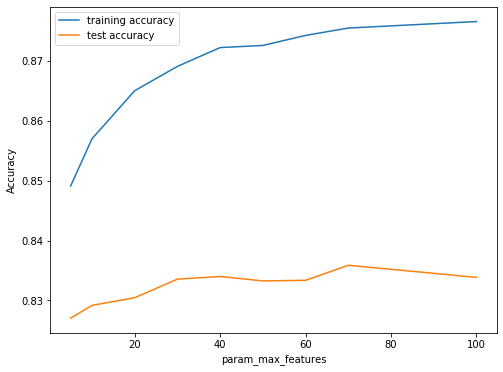

In [262]:
plt.figure(figsize=(8,6))
plt.plot(scores["param_max_features"], 
       scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model training accuracy is increasing as the features increases. While the test accuracy when we increase the feature and it started decreasing beyond > 100 features. This means model is intended towards overfit. Probably 45-50 features are good choice for building the model. 

In [263]:
#### trying to find the optimal hyper parameters using grid search cross validation
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(10, 150, 50),
    'min_samples_split': range(10, 50, 10),
    'n_estimators': [10,20,50], 
    'max_features': [5, 10, 20, 30, 40, 50]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',oob_score=True)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [264]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 74.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=None,
                           

In [265]:
# printing optimal score and hyper parameters
print('We get accuracy of ',grid_search.best_score_, 'with hyper parameters ',grid_search.best_params_)

We get accuracy of  0.8342927429274292 with hyper parameters  {'max_depth': 10, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}


#### Fitting the final model with the best parameters obtained from grid search

In [266]:
rfc_optimal_hyperparam = RandomForestClassifier(class_weight='balanced',
                                               bootstrap=True,
                                               max_depth=10,
                                               max_features=40,
                                               min_samples_leaf=10,
                                               min_samples_split=10,
                                               n_estimators=50)
rfc_optimal_hyperparam.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=40,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [267]:
rfc_optimal_hyperparam.score(X_test,y_test)

0.8371212121212122

#### Retrieve the feature importances

In [268]:
# get the list of important features
rfc_optimal_hyperparam.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.79212550e-03, 3.47302921e-03, 4.02798916e-03, 1.72486762e-03,
       1.56327640e-03, 1.98871885e-03, 1.97867574e-03, 2.20034041e-03,
       1.78035949e-03, 2.82544434e-04, 5.94333549e-04, 5.74861068e-04,
       5.76586196e-04, 6.01576040e-04, 4.28742913e-04, 1.46984384e-03,
       1.37784739e-03, 1.86471302e-03, 1.76533080e-03, 1.63453668e-03,
       2.05353415e-03, 6.92180213e-04, 7.10314488e-04, 6.48400378e-04,
       3.38049138e-04, 3.54253558e-04, 4.57152828e-04, 1.64062879e-03,
       1.29026667e-03, 2.60974783e-03, 1.43722675e-03, 1.25210312e-03,
       9.59697687e-04, 1.17448521e-03, 1.40915124e-03, 1.35319163e-03,
       2.39858344e-04, 2.03383781e-04, 2.73777582e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.04601477e-03, 2.27577761e-03,
       2.49598866e-03, 2.77114504e-05, 4.97986494e-05, 8.75203876e-05,
       1.37638071e-03, 1.59646456e-03, 1.31970426e-03, 3.21144181e-04,
      

In [368]:
pd.options.display.float_format = '{:.3f}'.format
feature_importances = pd.DataFrame(rfc_optimal_hyperparam.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)


In [369]:
feature_importances['feature_name']=feature_importances.index
feature_importances.reset_index(inplace=True)
feature_importances.drop(columns=['index'],inplace=True)
feature_importances

,importance,feature_name
0,0.223,fb_user_8
1,0.132,av_rech_amt_data_8
2,0.091,max_rech_data_8
3,0.091,vol_2g_mb_8
4,0.041,fb_user_7
5,0.039,vol_2g_mb_7
6,0.038,total_rech_data_8
7,0.036,vol_3g_mb_8
8,0.024,av_rech_amt_data_7
9,0.024,total_ic_mou_8


In [370]:
feature_importances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
importance      147 non-null float64
feature_name    147 non-null object
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [371]:
# remove all the features which has importance 0.00
feature_importances=feature_importances.loc[(feature_importances['importance'].round(2) > 0)]
feature_importances.shape

(21, 2)

In [373]:
## Getting a relative coeffient value for all the features
feature_importances['relative_feature_importances']=feature_importances['importance'].apply(lambda x: 100*(x/feature_importances['importance'].max()))
feature_importances.head()

,importance,feature_name,relative_feature_importances
0,0.223,fb_user_8,100.000
1,0.132,av_rech_amt_data_8,59.255
2,0.091,max_rech_data_8,40.931
3,0.091,vol_2g_mb_8,40.787
4,0.041,fb_user_7,18.221


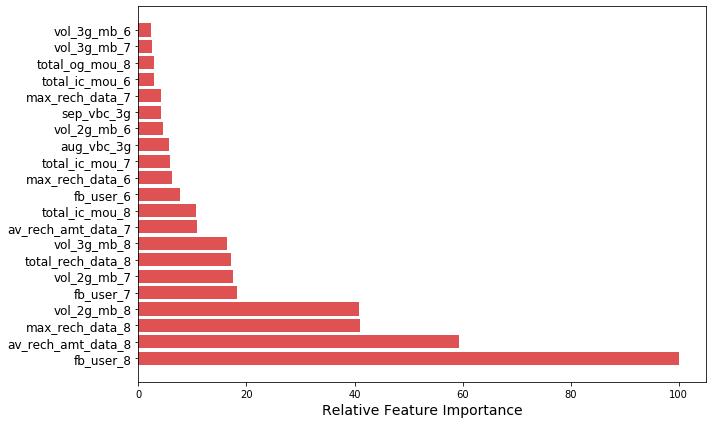

In [377]:
pos = np.arange(feature_importances['relative_feature_importances'].shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importances['relative_feature_importances'], align='center', color = 'tab:red',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(feature_importances['feature_name'], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

The imortance features are mostly the social network users and in the action phase they are doing more data recharge compared to good phase. Probably to manage the churn rate's for these set of customers service provider can offer some incentives in terms of mobile data usage. 